<a href="https://colab.research.google.com/github/gdeslo/GEDI_course/blob/notebook/GEDI_OZ_L2B_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with GEDI L2B Version 2 Data in Python
### This tutorial demonstrates how to work with the Canopy Cover and Vertical Profile Metrics ([GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)) data product.
The Global Ecosystem Dynamics Investigation ([GEDI](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/gedi-overview/)) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification and understanding of the Earth's carbon cycle and biodiversity. The GEDI instrument produces high resolution laser ranging observations of the 3-dimensional structure of the Earth. GEDI is attached to the International Space Station and collects data globally between 51.6 N and 51.6 S latitudes at the highest resolution and densest sampling of any light detection and ranging (lidar) instrument in orbit to date. The Land Processes Distributed Active Archive Center (LP DAAC) distributes the GEDI Level 1 and Level 2 Version 1 and Version 2 products. The L1B and L2 GEDI products are archived and distributed in the HDF-EOS5 file format.

---
## Use Case Example:  
This tutorial was developed using one of Q-ForestLab's current projects as an example. The QPRP project covers a network of permanent tropical rainforest plots in North-Eastern Queensland, Australia that spans both a rainfall and altitudinal gradient.  **The goal of this practical is to use GEDI L2B Version 2 data to observe tree canopy height, cover, and profile over the QPRP network.**

This tutorial will show how to use Python to open GEDI L2B Version 2 files, visualize the sub-orbit of GEDI points (shots), subset to a region of interest, visualize GEDI canopy height and vertical profile metrics, and export subsets of GEDI science dataset (SDS) layers as GeoJSON files that can be loaded into GIS and/or Remote Sensing software programs.

***    
### Data Used in the Example:  
- **GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level - [GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)**  
     - _The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD) and Foliage Height Diversity (FHD)._   
     - **Science Dataset (SDS) layers:**
        - /geolocation/digital_elevation_model
        - /geolocation/elev_lowestmode  
        - /geolocation/elev_highestreturn  
        - /geolocation/lat_lowestmode  
        - /geolocation/lon_lowestmode  
        - /rh100  
        - /l2b_quality_flag  
        - /degrade_flag  
        - /sensitivity  
        - /pai  
        - /pavd_z  
        - /geolocation/shot_number  
        - /dz  
        - /selected_l2a_algorithm
***  
# Topics Covered:
1. [**Get Started**](#getstarted)  
    1.1 Install packages
    1.2 Import Packages    
    1.3 Set Up the Working Environment and Retrieve Files      
2. [**Import and Interpret Data**](#importinterpret)      
    2.1 Open a GEDI HDF5 File and Read File Metadata     
    2.2 Read SDS Metadata and Subset by Beam   
3. [**Visualize a GEDI Sub-Orbit**](#visualizeorbit)      
    3.1 Subset by Layer and Create a Geodataframe   
    3.2 Visualize a Geodataframe
4. [**Work with GEDI L2B Data**](#L2B)        
    4.1 Import and Extract PAVD   
    4.2 Visualize PAVD    
5. [**Work with GEDI L2B Beam Transects**](#beamtransects)        
    5.1 Quality Filtering        
    5.2 Plot Beam Transects  
    5.3 Subset Beam Transects  
6. [**Plot Profile Transects**](#plottransects)      
    6.1 Plot PAVD Transects  
7. [**Spatial Visualization**](#spatialvisualization)      
    7.1 Import, Subset, and Quality Filter all Beams  
    7.2 Spatial Subsetting  
    7.3 Visualize All Beams: Canopy Height, Elevation, and PAI  
8. [**Export Subsets as GeoJSON Files**](#exportgeojson)     
       
***
# Before Starting this Tutorial:

This tutorial requires a compatible Python Environment and GEDI L2B granule from June 19, 2019 (orbit 02932, sub-orbit `02`) to download. To setup the Python environment and download the file, follow the steps in the github.

## Source Code used to Generate this Tutorial:
The repository containing all of the required files is located at: https://github.com/gdeslo/GEDI_course.git
  
<div class="alert alert-block alert-warning" >
<b>NOTE:</b> This tutorial was developed for GEDI L2B Version 2 HDF-EOS5 files and should only be used for that product. </div>   


---
# 1. Get Started <a id="getstarted"></a>

## 1.1 Install Packages <a id="1.1"></a>
#### Install the required packages.

In [ ]:
#!pip install geospatial geoviews
#!pip install "ipywidgets>=7,<8"

## 1.2 Import Packages <a id="1.1"></a>
#### Import the required packages and set the input/working directory to run this Jupyter Notebook locally.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
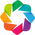

In [68]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import geoviews as gv
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

os.chdir('../../')

## 1.3 Set Up the Working Environment and Retrieve Files<a id="1.2"></a>
#### The input directory is defined as the current working directory. Note that you will need to have the Jupyter Notebook and example data (.h5 and .geojson) stored in this directory in order to execute the tutorial successfully.

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Change the directory to your specific working folder
new_dir = os.path.join('/content/drive/MyDrive', 'Colab Notebooks', 'GEDI_course')
os.chdir(new_dir)
# Verify the current directory
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/GEDI_course


#### You will need to download the file in order to execute this tutorial. Make sure to download the file into the `DATA` directory you made when setting up Google Colab.
You can use `earthaccess` package to download the data.

In [71]:
# !pip install earthaccess==0.8.2
import earthaccess
earthaccess.login(persist=True)
results = ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_B.002/GEDI02_B_2022344195102_O22626_01_T06507_02_003_01_V002/GEDI02_B_2022344195102_O22626_01_T06507_02_003_01_V002.h5']
# download
downloaded_files = earthaccess.download(
    results,
    local_path='DATA/',
)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [72]:
gediFiles = [g for g in os.listdir('DATA/') if g.startswith('GEDI02_B') and g.endswith('.h5')]  # List all GEDI L2B .h5 files in inDir
gediFiles

['GEDI02_B_2022344195102_O22626_01_T06507_02_003_01_V002.h5']

---
# 2. Import and Interpret Data <a id="importinterpret"></a>

## 2.1 Open a GEDI HDF5 File and Read File Metadata <a id="2.1"></a>
#### Read the file using `h5py`. This package is particularly useful for storing large amounts of numerical data.

In [ ]:
L2B = f'DATA/{gediFiles[0]}'
L2B

'DATA/GEDI02_B_2022344195102_O22626_01_T06507_02_003_01_V002.h5'

#### The standard format  for GEDI Version 2 filenames is as follows:
> **GEDI02_B**: Product Short Name    
**2019170155833**: Julian Date and Time of Acquisition (YYYYDDDHHMMSS)  
**O02932**: Orbit Number   
**02**: Sub-Orbit Granule Number (1-4)  
**T02267**: Track Number (Reference Ground Track)   
**02**: Positioning and Pointing Determination System (PPDS) type (00 is predict, 01 rapid, 02 and higher is final)  
**003**: PGE Version Number    
**01**: Granule Production Version  
**V002**: Product Version  

#### Read in a GEDI HDF5 file using the `h5py` package.

In [ ]:
gediL2B = h5py.File(L2B, 'r')  # Read file using h5py

#### Navigate the HDF5 file below.

In [ ]:
list(gediL2B.keys())

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

#### The GEDI HDF5 file contains groups in which data and metadata are stored.
#### First, the `METADATA` group contains the file-level metadata.

In [ ]:
list(gediL2B['METADATA'])

['DatasetIdentification']

This contains useful information such as the creation date, PGEVersion, and VersionID. Below, print the file-level metadata attributes.

In [ ]:
for g in gediL2B['METADATA']['DatasetIdentification'].attrs:
    print(g)

PGEVersion
VersionID
abstract
characterSet
creationDate
credit
fileName
language
originatorOrganizationName
purpose
shortName
spatialRepresentationType
status
topicCategory
uuid


In [ ]:
print(gediL2B['METADATA']['DatasetIdentification'].attrs['purpose'])

The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD) and Foliage Height Diversity (FHD).


## 2.2 Read SDS Metadata and Subset by Beam <a id="2.2"></a>

####  The GEDI instrument consists of 3 lasers producing a total of 8 beam ground transects. The eight remaining groups contain data for each of the eight GEDI beam transects. For additional information, be sure to check out: https://gedi.umd.edu/instrument/specifications/.

In [ ]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### One useful piece of metadata to retrieve from each beam transect is whether it is a full power beam or a coverage beam.
> The **Full Power Beam** nvolves operating the lidar at its maximum power output to achieve the highest possible signal-to-noise ratio. This can be particularly useful for penetrating dense canopies or for obtaining high-quality data in challenging conditions.

> The **Coverage Beam** is focused on maximizing the spatial coverage of the lidar measurements. It might involve using a wider beam or a different scanning pattern to cover a larger area.

In [ ]:
for g in gediL2B['BEAM0000'].attrs: print(g)

description
wp-l2-l2b_githash
wp-l2-l2b_version


In [ ]:
for b in beamNames:
    print(f"{b} is a {gediL2B[b].attrs['description']}")

BEAM0000 is a Coverage beam
BEAM0001 is a Coverage beam
BEAM0010 is a Coverage beam
BEAM0011 is a Coverage beam
BEAM0101 is a Full power beam
BEAM0110 is a Full power beam
BEAM1000 is a Full power beam
BEAM1011 is a Full power beam


#### Below, pick one of the full power beams that will be used to retrieve GEDI L2B shots in Section 3.

In [ ]:
beamNames = ['BEAM1000']

#### Identify all the objects in the GEDI HDF5 file below.
Note: This step may take a while to complete.

In [ ]:
gediL2B_objs = []
gediL2B.visit(gediL2B_objs.append)                                           # Retrieve list of datasets
gediSDS = [o for o in gediL2B_objs if isinstance(gediL2B[o], h5py.Dataset)]  # Search for relevant SDS inside data file
[i for i in gediSDS if beamNames[0] in i][:10]                               # Print the first 10 datasets for selected beam

['BEAM1000/algorithmrun_flag',
 'BEAM1000/ancillary/dz',
 'BEAM1000/ancillary/l2a_alg_count',
 'BEAM1000/ancillary/maxheight_cuttoff',
 'BEAM1000/ancillary/rg_eg_constraint_center_buffer',
 'BEAM1000/ancillary/rg_eg_mpfit_max_func_evals',
 'BEAM1000/ancillary/rg_eg_mpfit_maxiters',
 'BEAM1000/ancillary/rg_eg_mpfit_tolerance',
 'BEAM1000/ancillary/signal_search_buff',
 'BEAM1000/ancillary/tx_noise_stddev_multiplier']

---
# 3. Visualize a GEDI Orbit <a id="visualizeorbit"></a>
#### In the section below, import GEDI L2B SDS layers into a `GeoPandas` GeoDataFrame for the beam specified above.
#### Use the `lat_lowestmode` and `lon_lowestmode` to create a `shapely` point for each GEDI shot location.

## 3.1 Subset by Layer and Create a Geodataframe <a id="3.1"></a>

#### Read in the SDS and take a representative sample (every 100th shot) and append to lists, then use the lists to generate a `pandas` dataframe.

In [ ]:
lonSample, latSample, shotSample, qualitySample, beamSample = [], [], [], [], []  # Set up lists to store data

# Open the SDS
lats = gediL2B[f'{beamNames[0]}/geolocation/lat_lowestmode'][()]
lons = gediL2B[f'{beamNames[0]}/geolocation/lon_lowestmode'][()]
shots = gediL2B[f'{beamNames[0]}/geolocation/shot_number'][()]
quality = gediL2B[f'{beamNames[0]}/l2b_quality_flag'][()]

# Take every 100th shot and append to list
for i in range(len(shots)):
    if i % 100 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        qualitySample.append(quality[i])
        beamSample.append(beamNames[0])

# Write all of the sample shots to a dataframe
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Quality Flag': qualitySample})
latslons

,Beam,Shot Number,Longitude,Latitude,Quality Flag
0,BEAM1000,226260800100000001,113.471193,-43.811102,0
1,BEAM1000,226260800100000101,113.502161,-43.796849,0
2,BEAM1000,226260800100000201,113.533147,-43.782566,0
3,BEAM1000,226260800100000301,113.562902,-43.768843,0
4,BEAM1000,226260800100000401,113.592688,-43.755102,0
...,...,...,...,...,...
1059,BEAM1000,226260800100105901,155.480450,-4.202643,0
1060,BEAM1000,226260800100106001,155.493912,-4.184152,0
1061,BEAM1000,226260800100106101,155.510008,-4.161068,0
1062,BEAM1000,226260800100106201,155.524909,-4.140045,0


#### Above is a dataframe containing columns describing the beam, shot number, lat/lon location, and quality information about each shot.

#### Below, create an additional column called 'geometry' that contains a `shapely` point generated from each lat/lon location from the shot.

In [ ]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
latslons['geometry'] = latslons.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

#### Next, convert to a `Geopandas` GeoDataFrame.

In [ ]:
# Convert to a Geodataframe
latslons = gp.GeoDataFrame(latslons)
latslons = latslons.drop(columns=['Latitude','Longitude'])
latslons['geometry']

,geometry
0,POINT (113.47119 -43.8111)
1,POINT (113.50216 -43.79685)
2,POINT (113.53315 -43.78257)
3,POINT (113.5629 -43.76884)
4,POINT (113.59269 -43.7551)
...,...
1059,POINT (155.48045 -4.20264)
1060,POINT (155.49391 -4.18415)
1061,POINT (155.51001 -4.16107)
1062,POINT (155.52491 -4.14005)


#### Pull out and plot an example `shapely` point below.

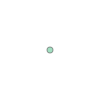

In [ ]:
latslons['geometry'][0]

## 3.2 Visualize a GeoDataFrame <a id="3.2"></a>
#### In this section, use the GeoDataFrame of Queensland and the QPRP plots, and use the `leafmap` python package to spatially visualize the location of the GEDI shots on a basemap.

#### Import a GeoJSON of Queensland and the QPRP plots as a GeoDataFrame. Note that you will need to have downloaded the folder with DATA to your Google Drive.

In [ ]:
import geopandas as gpd
plots = 'DATA/plots.shp'
plots_gdf = gpd.read_file(plots, encoding='ISO-8859-1')
QLD = gpd.read_file('DATA/QLD.geojson')

In [ ]:
#make a bbox to zoom center on
bbox = QLD.total_bounds
bbox

array([143.931885, -18.802318, 146.942139, -15.485445])

Now we make a simple interactive map using `leafmap` that shows Queensland and the QPRP plots. A new window might open on the right; you can simply close it and continue running the script.

In [ ]:
import leafmap
m = leafmap.Map()
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.5})
m.add_markers(plots_gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Congrats, you made your first map.

Next, let's make a new map that also adds all the GEDI shots.

In [ ]:
m = leafmap.Map()
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.5})
m.add_markers(latslons, shape="circle", radius=2, color="red", fill_color="red", popup=["geometry", "Beam", "Shot Number", "Quality Flag"])
m.add_markers(plots_gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Above is a good illustration of the new GEDI _Version 2_ sub-orbit granules (remember that GEDI _Version 1_  files are stored as one ISS orbit). One of the benefits of using 	`leafmap` is the interactive nature of the output maps. Use the tools in the upper right of the map and try zooming in to find interesting shots close to QPRP plots.

Side Note: Wondering what the 0's and 1's for `l2b_quality_flag` mean?

In [ ]:
print(f"Quality Flag: {gediL2B[b]['l2b_quality_flag'].attrs['description']}")

Quality Flag: Flag simpilfying selection of most useful data for Level 2B


Above, 0 is poor quality and a quality_flag value of 1 indicates the laser shot meets criteria based on energy, sensitivity, amplitude, and real-time surface tracking quality. We will show an example of how to quality filter GEDI data in section 5.1.
After finding one of the shots close to a QPRP plot and with a quality index of 1, find the index for that shot number so that we can find the correct shot to visualize in Section 4.

#### Each GEDI shot has a unique shot identifier (shot number) that is available within each data group of the product. The shot number is important to retain in any data subsetting as it will allow the user to link any shot record back to the original orbit data, and to link any shot and its data between the L1 and L2 products. The standard format  for GEDI Shots is as follows:

### Shot: 29320600200465601
> **2932**: Orbit Number      
**06**: Beam Number    
**0**: Reserved for future use     
**02**: Sub-orbit Granule Number    
**004**: Minor frame number   
**65601**: Shot index  

---
# 4. Work with GEDI L2B Data <a id="L2B"></a>
#### The L2B product contains biophysical information derived from the geolocated GEDI return waveforms including total and vertical profiles of canopy cover and Plant Area Index (PAI), the vertical Plant Area Volume Density (PAVD) profile, and Foliage Height Diversity (FHD).
Detailed product information can be found on the [GEDI L2B Product Page](https://doi.org/10.5067/GEDI/GEDI02_B.002).

## 4.1 Import and Extract Specific Shots
Notice that there are over a thousand datasets available in the GEDI L2B product. In the code blocks below, you will subset to just a few of the datasets available.

This section teaches how to extract and subset specific shots and plot Plant Area Volume Density (PAVD) using `matplotlib`.
`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python,
making it a valuable tool for data analysis and visualization.

In [ ]:
len(gediSDS)

1576

In [ ]:
beamNames

['BEAM1000']

In [ ]:
beamSDS = [g for g in gediSDS if beamNames[0] in g]  # Subset to a single beam
len(beamSDS)

197

We will set 2 shot indeces as an example. These shotindeces will work for all the following code. Feel free to set it to different shots, however take into account that it is not guaranteed that everything will work.

In [ ]:
shot1 = 226260800100073901
shot2 = 226260800100073601

In [ ]:
index1 = np.where(gediL2B[f'{beamNames[0]}/shot_number'][()]==shot1)[0][0]  # Set the index for the first shot identified above
index1

73900

In [ ]:
index2 = np.where(gediL2B[f'{beamNames[0]}/shot_number'][()]==shot2)[0][0]  # Set the index for the second shot identified above
index2

73600

## 4.2 Visualize PAVD
Now we import the PAVD metrics (`pavd_z`) and begin exploring how to plot them.

In [ ]:
pavd = gediL2B[[g for g in beamSDS if g.endswith('/pavd_z')][0]]  # PAVD

Print the description for the PAVD dataset.

In [ ]:
print(f"Plant Area Volume Density is {pavd.attrs['description']}")

Plant Area Volume Density is Vertical Plant Area Volume Density profile with a vertical step size of dZ


Below, open the `dz` layer in order to define the correct vertical step size.

In [ ]:
# Grab vertical step size
dz = gediL2B[f'{beamNames[0]}/ancillary/dz'][0]
dz

5.0

So the vertical step size is 5.0 meters.

In [ ]:
print(f"The shape of PAVD is {pavd.shape}.")

The shape of PAVD is (106306, 30).


And it looks like PAVD includes 30 "steps" in each shot, describing the PAVD at height = step # * `dz`.

Now, bring in other useful L2B datasets such as `elev_lowestmode`, `lat_lowestmode` and `lon_lowestmode`.

In [ ]:
# Bring in the desired SDS
elev = gediL2B[f'{beamNames[0]}/geolocation/elev_lowestmode'][()]  # Latitude
lats = gediL2B[f'{beamNames[0]}/geolocation/lat_lowestmode'][()]  # Latitude
lons = gediL2B[f'{beamNames[0]}/geolocation/lon_lowestmode'][()]  # Longitude

Grab the location, elevation, and PAVD metrics for the shots defined above:

In [ ]:
shotElev1 = elev[index1]
shotLat1 = lats[index1]
shotLon1 = lons[index1]
shotPAVD1 = pavd[index1]

#now for shot 2
shotElev2 = elev[index2]
shotLat2 = lats[index2]
shotLon2 = lons[index2]
shotPAVD2 = pavd[index2]

Put everything together to identify the shots that we want to extract:

In [ ]:
print(f"The first shot is located at: {str(shotLat1)}, {str(shotLon1)} (shot ID: {shot1}, index {index1}) and is from {beamNames[0]}.")
print(f"The second shot is located at: {str(shotLat2)}, {str(shotLon2)} (shot ID: {shot2}, index {index2}) and is from {beamNames[0]}.")

The first shot is located at: -17.439383887594833, 145.59592035601435 (shot ID: 226260800100073901, index 73900) and is from BEAM1000.
The second shot is located at: -17.5617925541215, 145.49698939422302 (shot ID: 226260800100073601, index 73600) and is from BEAM1000.


Next, reformat PAVD into a list of tuples containing each PAVD value and height.

In [ ]:
# Append the first shot to the list
pavdAll1 = []
pavdElev1 = []

for i, e in enumerate(range(len(shotPAVD1))):
    if shotPAVD1[i] > 0:
        pavdElev1.append((shot1, shotElev1 + dz * i, shotPAVD1[i]))  # Append tuple of shot number, elevation, and PAVD
pavdAll1.append(pavdElev1)                                         # Append to final list

# Append the second shot to the list
pavdAll2 = []
pavdElev2 = []

for i, e in enumerate(range(len(shotPAVD2))):
    if shotPAVD2[i] > 0:
        pavdElev2.append((shot2, shotElev2 + dz * i, shotPAVD2[i]))  # Append tuple of shot number, elevation, and PAVD
pavdAll2.append(pavdElev2)                                         # Append to final list

Below, plot each shot by using `matplotlib`

In [ ]:
pavdAll1

[[(226260800100073901, 841.378173828125, 0.0011634467),
  (226260800100073901, 846.378173828125, 0.00058172335)]]

In [ ]:
pavdAll2

[[(226260800100073601, 1140.8712158203125, 0.037622105),
  (226260800100073601, 1145.8712158203125, 0.02158315),
  (226260800100073601, 1150.8712158203125, 0.0073676156),
  (226260800100073601, 1155.8712158203125, 0.011193232),
  (226260800100073601, 1160.8712158203125, 0.011290111),
  (226260800100073601, 1165.8712158203125, 0.0069349734),
  (226260800100073601, 1170.8712158203125, 0.0022425766)]]

In [ ]:
# Create Holoviews Paths
path1 = hv.Path(pavdAll1, vdims='PAVD').opts(
    color='PAVD', clim=(0, 0.1), cmap='Greens', line_width=20, colorbar=True,
    width=700, height=550, clabel='PAVD', xlabel='Shot Number',
    ylabel='Elevation (m)', fontsize={'title': 16, 'xlabel': 16, 'ylabel': 16,
                                      'xticks': 12, 'yticks': 12,
                                      'clabel': 12, 'cticks': 10},
    shared_axes=False  # ✅ Allows independent Y-axis for visibility
)

path2 = hv.Path(pavdAll2, vdims='PAVD').opts(
    color='PAVD', clim=(0, 0.1), cmap='Greens', line_width=20, colorbar=True,
    width=700, height=550, clabel='PAVD', xlabel='Shot Number',
    ylabel='Elevation (m)', fontsize={'title': 16, 'xlabel': 16, 'ylabel': 16,
                                      'xticks': 12, 'yticks': 12,
                                      'clabel': 12, 'cticks': 10},
    shared_axes=False  # ✅ Different scaling for better visibility
)

# Display side by side without shared axes
(path1 + path2).opts(shared_axes=False)



:Layout
   .Path.I  :Path   [x,y]   (PAVD)
   .Path.II :Path   [x,y]   (PAVD)

### 🎉 Congratulations! You have plotted your first PAVD profile.

Now, let's analyze the results and reflect on the data.

#### 🧐 Questions to Think About:

1. **Axes & Scaling**
   - What do you notice about the axes for elevation? How does this affect the way PAVD is displayed?
   - Why do the two plots have different elevation ranges? What does this tell us about the two shots?
   - If we had used the same y-axis limits for both graphs, what would change?

2. **PAVD Distribution**
   - Which regions in the plot have the highest PAVD values? What does this mean in terms of canopy structure?
   - Is the PAVD distribution continuous or patchy? Why might this be the case?
   - How does the PAVD vary with elevation? Is there a pattern you can identify?

3. **Data Representation**
   - The PAVD is color-coded using a gradient from light green to dark green. What does a darker color indicate?
   - Does the color scale influence how you interpret the data? If so, how?
   - If we used a different colormap (e.g., ‘Reds’ instead of ‘Greens’), how might that affect interpretation?

4. **Scientific Interpretation**
   - What could cause one shot to have higher PAVD values at certain elevations than the other?
   - How do these profiles relate to forest structure? Can you infer anything about canopy height or density?
   - If you were collecting more data, what other variables would you want to include for a better understanding of PAVD?

5. **Extra**: Using what you've learned, describe what you would expect to see in a PAVD profile for:
   - A dense tropical rainforest
   - An open savanna
   - A recently logged forest



---
# 5. Work with GEDI L2B Beam Transects<a id="beamtransects"></a>
#### Next, import a number of desired SDS layers for BEAM0110 (for the entire orbit) and create a `pandas` Dataframe to store the arrays.

In [ ]:
# Open all of the desired SDS
dem = gediL2B[[g for g in beamSDS if g.endswith('/digital_elevation_model')][0]][()]
zElevation = gediL2B[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][()]
zHigh = gediL2B[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][()]
zLat = gediL2B[[g for g in beamSDS if g.endswith('/lat_lowestmode')][0]][()]
zLon = gediL2B[[g for g in beamSDS if g.endswith('/lon_lowestmode')][0]][()]
canopyHeight = gediL2B[[g for g in beamSDS if g.endswith('/rh100')][0]][()]
quality = gediL2B[[g for g in beamSDS if g.endswith('/l2b_quality_flag')][0]][()]
degrade = gediL2B[[g for g in beamSDS if g.endswith('/degrade_flag')][0]][()]
sensitivity = gediL2B[[g for g in beamSDS if g.endswith('/sensitivity')][0]][()]
pavd = gediL2B[f'{beamNames[0]}/pavd_z'][()]
shotNums = gediL2B[f'{beamNames[0]}/shot_number'][()]
selectedAlgorithmL2A = gediL2B[[g for g in beamSDS if g.endswith('/selected_l2a_algorithm')][0]][()]

# Create a shot index
shotIndex = np.arange(shotNums.size)

#### In the GEDI L2B product, Canopy Height is stored in units (cm), so below convert to meters.

In [ ]:
canopyHeight = canopyHeight / 100  # Convert RH100 from cm to m

#### As mentioned in the sections above, Plant Area Volume Density (pavd) is defined as the _Vertical Plant Area Volume Density profile with a vertical step size of dZ_. Below, reformat the shape of the PAVD layer in order to add it to the dataframe below.

In [ ]:
print(f"The shape of Canopy Height is {canopyHeight.shape} vs. the shape of PAVD, which is {pavd.shape}.")

The shape of Canopy Height is (106306,) vs. the shape of PAVD, which is (106306, 30).


#### Above, notice that unlike a SDS layer like Canopy Height, which has a single value for each shot, PAVD has 30 values (representing different vertical heights) for each shot.
#### Below, reformat the data into a list of values for each shot.

In [ ]:
# Set up an empty list to append to
pavdA = []
for i in range(len(pavd)):

    # If any of the values are fill value, set to nan
    pavdF = [np.nan]
    for p in range(len(pavd[i])):
        if pavd[i][p]!= -9999:
            pavdF.append(pavd[i][p])  # If the value is not fill value, append to list
    pavdA.append(pavdF)               # Append back to master list

#### Note: The cell above may take up to a minute to process.

#### Below, notice the reformatted PAVD layer, which should now fit into the dataframe created below.

In [ ]:
len(pavdA)

106306

In [ ]:
# Take the DEM, GEDI-produced Elevation, and Canopy height and add to a Pandas dataframe
transectDF = pd.DataFrame({
    'Shot Index': shotIndex,
    'Shot Number': shotNums,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Degrade Flag': degrade,
    'Plant Area Volume Density': pavdA,
    'Sensitivity': sensitivity,
    'Selected L2A Algorithm': selectedAlgorithmL2A
    })

In [ ]:
transectDF

,Shot Index,Shot Number,Latitude,Longitude,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Degrade Flag,Plant Area Volume Density,Sensitivity,Selected L2A Algorithm
0,0,226260800100000001,-43.811102,113.471193,-999999.0,8066.353516,8066.353516,0.0,0,0,[nan],5.068176,1
1,1,226260800100000002,-43.810965,113.471491,-999999.0,8066.902344,8066.902344,0.0,0,0,[nan],-6.772878,1
2,2,226260800100000003,-43.810828,113.471789,-999999.0,8066.253906,8066.253906,0.0,0,0,[nan],17.507156,1
3,3,226260800100000004,-43.810691,113.472087,-999999.0,8066.203613,8066.203613,0.0,0,0,[nan],-6.623987,1
4,4,226260800100000005,-43.810554,113.472384,-999999.0,8066.153809,8066.153809,0.0,0,0,[nan],5.166248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106301,106301,226260800100106302,-4.119599,155.539600,-999999.0,1063.435425,1063.435425,0.0,0,0,[nan],-0.064876,1
106302,106302,226260800100106303,-4.119389,155.539749,-999999.0,1062.794189,1062.794189,0.0,0,0,[nan],-0.485945,1
106303,106303,226260800100106304,-4.119179,155.539899,-999999.0,1062.751709,1062.751709,0.0,0,0,[nan],9.365466,1
106304,106304,226260800100106305,-4.118969,155.540048,-999999.0,1062.709473,1062.709473,0.0,0,0,[nan],-2.513619,1


In [ ]:
index1

73900

#### Notice the unusual values listed above--those shots are flagged as poor quality and will be removed in Section 5.1.
#### Now that you have the desired SDS into a `pandas` dataframe, begin plotting the entire beam transect:

In [ ]:
# Plot Canopy Height
canopyVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Height (rh100)']))
canopyVis.opts(color='darkgreen', height=500, width=900, title=f'GEDI L2B Full Transect {beamNames[0]}',
               fontsize={'title':16, 'xlabel':16, 'ylabel': 16}, size=0.1, xlabel='Shot Index', ylabel='Canopy Height (m)')

:Scatter   [x]   (y)

#### Congratulations! You have plotted your first GEDI sub-orbit beam transect. Notice above that things look a little messy--before we dive deeper into plotting full transects, let's quality filter the shots in the section below.

## 5.1 Quality Filtering
#### Now that you have the desired layers imported as a dataframe for the entire beam transect, let's perform quality filtering.
#### Below, remove any shots where the `l2b_quality_flag` is set to 0 by defining those shots as `nan`.
#### The syntax of the line below can be read as: in the dataframe, find the rows "where" the quality flag is not equal (ne) to 0. If a row (shot) does not meet the condition, set all values equal to `nan` for that row.

In [ ]:
transectDF = transectDF.where(transectDF['Quality Flag'].ne(0))  # Set any poor quality returns to NaN

In [ ]:
transectDF

,Shot Index,Shot Number,Latitude,Longitude,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Degrade Flag,Plant Area Volume Density,Sensitivity,Selected L2A Algorithm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Below, quality filter even further by using the `degrade_flag` (Greater than zero if the shot occurs during a degrade period, zero otherwise) and the `Sensitivity` layer, using a threshold of 0.95.

In [ ]:
transectDF = transectDF.where(transectDF['Degrade Flag'] < 1)
transectDF = transectDF.where(transectDF['Sensitivity'] > 0.95)

#### Below, drop all of the shots that did not pass the quality filtering standards outlined above from the `transectDF`.

In [ ]:
transectDF = transectDF.dropna()  # Drop all of the rows (shots) that did not pass the quality filtering above

In [ ]:
print(f"Quality filtering complete, {len(transectDF)} high quality shots remaining.")

Quality filtering complete, 21595 high quality shots remaining.


## 5.2 Plot Beam Transects
#### Next, plot the full remaining transect of high quality values using `holoviews` Scatter(). Combine the Tandem-X derived elevation, the GEDI-derived elevation, and the Canopy Top Elevation in a combined holoviews plot.

In [ ]:
# Plot Digital Elevation Model
demVis = hv.Scatter((transectDF['Shot Index'], transectDF['Tandem-X DEM']), label='Tandem-X DEM')
demVis = demVis.opts(color='black', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [ ]:
# Plot GEDI-Retrieved Elevation
zVis = hv.Scatter((transectDF['Shot Index'], transectDF['Elevation (m)']), label='GEDI-derived Elevation')
zVis = zVis.opts(color='saddlebrown', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [ ]:
# Plot Canopy Top Elevation
rhVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Elevation (m)']), label='Canopy Top Elevation')
rhVis = rhVis.opts(color='darkgreen', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5,
                   tools=['hover'], xlabel='Shot Index', ylabel='Elevation (m)')

In [ ]:
# Combine all three scatterplots
(demVis * zVis * rhVis).opts(show_legend=True, legend_position='top_left',fontsize={'title':14, 'xlabel':16, 'ylabel': 16},
                             title=f'{beamNames[0]} Full Transect: {L2B.split(".")[0]}')

:Overlay
   .Scatter.Tandem_hyphen_minus_X_DEM           :Scatter   [x]   (y)
   .Scatter.GEDI_hyphen_minus_derived_Elevation :Scatter   [x]   (y)
   .Scatter.Canopy_Top_Elevation                :Scatter   [x]   (y)

#### The plot still looks a bit messy this far zoomed out--feel free to pan, zoom, and explore different areas of the plot. The waveforms plotted in section 4 were 46597-46600. If you zoom into the high-quality shots between 4.000e+5 and 5.000e+5, you will find the portion of the transect intersecting Redwood National Park, seen below:
![GEDI_L2B_V2_Tutorial_2.png](../../img/GEDI_L2B_V2_Tutorial_2.png "BEAM0110 Transect Plot of Tandem-X Elevation, GEDI-derived Elevation, and Canopy Top Elevation over Redwood National Park, USA.")

## 5.3 Subset Beam Transects

#### Now, subset down to a smaller transect centered on the shot analyzed in the sections above.

In [ ]:
index1

73900

In [ ]:
transectDF

,Shot Index,Shot Number,Latitude,Longitude,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Degrade Flag,Plant Area Volume Density,Sensitivity,Selected L2A Algorithm
3540,3540.0,2.262608e+17,-43.019028,115.141894,-999999.000000,-30.330364,-27.298246,3.02,1.0,0.0,"[nan, 0.081501715, 0.040750857, -0.0, -0.0, -0...",0.955877,1.0
3542,3542.0,2.262608e+17,-43.018460,115.143055,-999999.000000,-29.992172,-27.034922,2.95,1.0,0.0,"[nan, 0.0283275, 0.01416375, -0.0, -0.0, -0.0,...",0.967700,1.0
3543,3543.0,2.262608e+17,-43.018177,115.143635,-999999.000000,-30.791988,-28.134207,2.65,1.0,0.0,"[nan, 0.023562437, 0.011781218, -0.0, -0.0, -0...",0.967294,1.0
3544,3544.0,2.262608e+17,-43.017894,115.144215,-999999.000000,-30.731527,-28.036310,2.69,1.0,0.0,"[nan, 0.0554477, 0.02772385, -0.0, -0.0, -0.0,...",0.956250,1.0
3546,3546.0,2.262608e+17,-43.017326,115.145376,-999999.000000,-29.604776,-26.722391,2.88,1.0,0.0,"[nan, 0.0073417905, 0.0036708952, -0.0, -0.0, ...",0.978040,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102885,102885.0,2.262608e+17,-5.324355,154.683247,136.297363,131.871506,153.509979,21.62,1.0,0.0,"[nan, 0.08609723, 0.11479478, 0.15751757, 0.11...",0.960384,2.0
102907,102907.0,2.262608e+17,-5.315133,154.689814,137.220703,130.706573,142.723785,12.01,1.0,0.0,"[nan, 0.1753763, 0.12713863, 0.04745629, 0.008...",0.973355,2.0
102908,102908.0,2.262608e+17,-5.314713,154.690113,137.220703,133.344193,147.158371,13.81,1.0,0.0,"[nan, 0.061819494, 0.06053355, 0.043782223, 0....",0.971668,2.0
102909,102909.0,2.262608e+17,-5.314293,154.690413,146.113007,138.242615,143.596085,5.34,1.0,0.0,"[nan, 0.007197765, 0.004221941, 0.0006230582, ...",0.979811,2.0


In [ ]:
# Grab 50 points before and after the first shot visualized above
start1 = index1 - 50
end1 = index1 + 50
# Grab 50 points before and after the second shot visualized above
start2 = index2 - 50
end2 = index2 + 50

In [ ]:
transectDF['Latitude']

3540     -43.019028
3542     -43.018460
3543     -43.018177
3544     -43.017894
3546     -43.017326
            ...    
102885    -5.324355
102907    -5.315133
102908    -5.314713
102909    -5.314293
102913    -5.312634
Name: Latitude, Length: 21595, dtype: float64

#### Below, subset the transect using `.loc`.

In [ ]:
transectDF1 = transectDF.loc[start1:end1]  # Subset the Dataframe to only the selected region of interest for shot 1
transectDF2 = transectDF.loc[start2:end2]  # Subset the Dataframe to only the selected region of interest for shot 2

---
# 6. Plot Profile Transects <a id="plottransects"></a>
#### In this section, plot the transect subset using elevation, canopy height, and plant area volume density (PAVD) metrics.

#### In order to get an idea of the length of the beam transect that you are plotting, you can plot the x-axis as distance, which is calculated below.

In [ ]:
# Calculate along-track distance for each shot
distance1 = np.arange(0.0, len(transectDF1.index) * 60, 60)  # GEDI Shots are spaced 60 m apart
transectDF1['Distance'] = distance1                          # Add Distance as a new column in the dataframe
distance2 = np.arange(0.0, len(transectDF2.index) * 60, 60)  # GEDI Shots are spaced 60 m apart
transectDF2['Distance'] = distance2                          # Add Distance as a new column in the dataframe

## 6.1 Plot PAVD Transects

#### Similar to what was done with PAVD in the sections above, reformat PAVD into a list of tuples containing each PAVD value and height by shot.

In [ ]:
pavdAll1 = []
for j, s in enumerate(transectDF1.index):
    pavdShot1 = transectDF1['Plant Area Volume Density'][s]
    elevShot1 = transectDF1['Elevation (m)'][s]
    pavdElev1 = []

    # Remove fill values
    if np.isnan(pavdShot1).all():
        continue
    else:
        del pavdShot1[0]
    for i, e in enumerate(range(len(pavdShot1))):
        if pavdShot1[i] > 0:
            pavdElev1.append((distance1[j], elevShot1 + dz * i, pavdShot1[i]))  # Append tuple of distance, elevation, and PAVD
    pavdAll1.append(pavdElev1)                                                # Append to final list


pavdAll2 = []
for j, s in enumerate(transectDF2.index):
    pavdShot2 = transectDF2['Plant Area Volume Density'][s]
    elevShot2 = transectDF2['Elevation (m)'][s]
    pavdElev2 = []

    # Remove fill values
    if np.isnan(pavdShot2).all():
        continue
    else:
        del pavdShot2[0]
    for i, e in enumerate(range(len(pavdShot2))):
        if pavdShot2[i] > 0:
            pavdElev2.append((distance2[j], elevShot2 + dz * i, pavdShot2[i]))  # Append tuple of distance, elevation, and PAVD
    pavdAll2.append(pavdElev2)                                                # Append to final list

In [ ]:
pavdAll1

[[(0.0, 820.5577392578125, 0.044536967),
  (0.0, 825.5577392578125, 0.016178735)],
 [(60.0, 818.6340942382812, 0.19887598),
  (60.0, 823.6340942382812, 0.058196947),
  (60.0, 828.6340942382812, 0.0022064755)],
 [(120.0, 819.122314453125, 0.12660994),
  (120.0, 824.122314453125, 0.105026014),
  (120.0, 829.122314453125, 0.038790345),
  (120.0, 834.122314453125, 0.0051223547)],
 [(180.0, 825.426513671875, 2.368196e-05)],
 [],
 [(300.0, 826.3485717773438, 0.16542798),
  (300.0, 831.3485717773438, 0.020722393)],
 [],
 [],
 [(480.0, 841.4974365234375, 0.12111206),
  (480.0, 846.4974365234375, 0.006224042)],
 [],
 [(600.0, 851.2774047851562, 0.0033422555)],
 [(660.0, 850.596923828125, 0.0024945703)],
 [(720.0, 843.889404296875, 0.034461457),
  (720.0, 848.889404296875, 0.005556288)],
 [(780.0, 840.6160278320312, 0.05298158),
  (780.0, 845.6160278320312, 0.0006943637)],
 [(840.0, 827.5087890625, 0.082163885),
  (840.0, 832.5087890625, 0.05690582),
  (840.0, 837.5087890625, 0.026429705),
  (84

In [ ]:
pavdAll2

[[(0.0, 976.4552001953125, 0.054094095),
  (0.0, 981.4552001953125, 0.057341844),
  (0.0, 986.4552001953125, 0.06380514),
  (0.0, 991.4552001953125, 0.052610174),
  (0.0, 996.4552001953125, 0.048596866),
  (0.0, 1001.4552001953125, 0.05310388),
  (0.0, 1006.4552001953125, 0.042898174),
  (0.0, 1011.4552001953125, 0.017984768),
  (0.0, 1016.4552001953125, 0.001062418)],
 [(60.0, 996.6442260742188, 0.074962914),
  (60.0, 1001.6442260742188, 0.1307732),
  (60.0, 1006.6442260742188, 0.12160033),
  (60.0, 1011.6442260742188, 0.068195365),
  (60.0, 1016.6442260742188, 0.041877173),
  (60.0, 1021.6442260742188, 0.023804724),
  (60.0, 1026.6442260742188, 0.0052615134)],
 [(120.0, 1001.8351440429688, 0.101053275),
  (120.0, 1006.8351440429688, 0.13679995),
  (120.0, 1011.8351440429688, 0.1371254),
  (120.0, 1016.8351440429688, 0.118551016),
  (120.0, 1021.8351440429688, 0.068941526),
  (120.0, 1026.8351440429688, 0.01545967)],
 [(180.0, 1007.520263671875, 0.101712234),
  (180.0, 1012.5202636718

In [ ]:
canopyElevation1 = [p[-1][1] for p in pavdAll1 if p]  # Only use non-empty lists
canopyElevation2 = [p[-1][1] for p in pavdAll2 if p]


In [ ]:
print("pavdAll1 structure:", type(pavdAll1), "Length:", len(pavdAll1))
print("Example entry in pavdAll1:", pavdAll1[0] if pavdAll1 else "Empty")
print("pavdAll2 structure:", type(pavdAll2), "Length:", len(pavdAll2))
print("Example entry in pavdAll2:", pavdAll2[0] if pavdAll2 else "Empty")


pavdAll1 structure: <class 'list'> Length: 41
Example entry in pavdAll1: [(0.0, 820.5577392578125, 0.044536967), (0.0, 825.5577392578125, 0.016178735)]
pavdAll2 structure: <class 'list'> Length: 92
Example entry in pavdAll2: [(0.0, 976.4552001953125, 0.054094095), (0.0, 981.4552001953125, 0.057341844), (0.0, 986.4552001953125, 0.06380514), (0.0, 991.4552001953125, 0.052610174), (0.0, 996.4552001953125, 0.048596866), (0.0, 1001.4552001953125, 0.05310388), (0.0, 1006.4552001953125, 0.042898174), (0.0, 1011.4552001953125, 0.017984768), (0.0, 1016.4552001953125, 0.001062418)]


#### Below, plot each shot by using `holoviews` Path() function, with the PAVD plotted in the third dimension in shades of green.

In [ ]:


# Remove empty sublists
pavdAll1 = [sublist for sublist in pavdAll1 if sublist]
pavdAll2 = [sublist for sublist in pavdAll2 if sublist]

# Convert to NumPy arrays for consistency
pavdAll1 = [np.array(sublist) for sublist in pavdAll1]
pavdAll2 = [np.array(sublist) for sublist in pavdAll2]


In [ ]:
path1 = hv.Path(pavdAll1, vdims='PAVD').options(color='PAVD', clim=(0,0.3), cmap='Greens', line_width=8, colorbar=True,
                                               width=950, height=500, clabel='PAVD', xlabel='Distance Along Transect (m)',
                                               ylabel='Elevation (m)', fontsize={'title':16, 'xlabel':16, 'ylabel': 16,
                                                                                 'xticks':12, 'yticks':12,
                                                                                 'clabel':12, 'cticks':10})

path2 = hv.Path(pavdAll2, vdims='PAVD').options(color='PAVD', clim=(0,0.3), cmap='Greens', line_width=8, colorbar=True,
                                                  width=950, height=500, clabel='PAVD', xlabel='Distance Along Transect (m)',
                                                  ylabel='Elevation (m)', fontsize={'title':16, 'xlabel':16, 'ylabel': 16,
                                                                                    'xticks':12, 'yticks':12,
                                                                                    'clabel':12, 'cticks':10})



# Display them separately instead of forcing alignment
hv.Layout([path1, path2]).opts(shared_axes=False)


:Layout
   .Path.I  :Path   [x,y]   (PAVD)
   .Path.II :Path   [x,y]   (PAVD)

#### Add in the ground elevation and canopy top elevation for better context as to where in the canopy the highest PAVD exists.

In [ ]:
path1_2 = hv.Curve((distance1, transectDF1['Elevation (m)']), label='Ground Elevation').options(color='black', line_width=2)
path2_2 = hv.Curve((distance2, transectDF2['Elevation (m)']), label='Ground Elevation').options(color='black', line_width=2)

path1_3 = hv.Curve((distance1, canopyElevation1), label='Canopy Top Elevation').options(color='grey', line_width=1.5)
path2_3 = hv.Curve((distance2, canopyElevation2), label='Canopy Top Elevation').options(color='grey', line_width=1.5)

DataError: None of the available storage backends were able to support the supplied data format.

In [ ]:
# Plot all three together
path = path1 * path2 * path3
path.opts(height=500,width=980, ylim=(min(transectDF['Elevation (m)']) - 5, max(canopyElevation) + 5),
          xlabel='Distance Along Transect (m)', ylabel='Elevation (m)', legend_position='bottom_right',
          fontsize={'title':15, 'xlabel':15, 'ylabel': 15, 'xticks': 14, 'yticks': 14, 'legend': 14},
          title=f'GEDI L2B {beamNames[0]} PAVD over Dinden National Park, Queensland, Australia in 2022')

In [ ]:
#save graph
hv.save(path, 'DATA/GEDI_L2B_PAVD.html')

#### Above, you can get an idea about the terrain over the region of interest, particularly the classic "V" representing the river valley that is bisected by the transect. In terms of vegetation structure, this plot does a good job of showing not only which portions of the canopy are taller, but also where they are denser (darker shades of green).

In [ ]:
del distance, canopyElevation, pavdAll, pavdElev, pavdShot, transectDF

### At this point you have visualized the elevation, canopy, and vertical structure of specific footprints over Redwood national park, and for a transect cutting through the national park. In section 7 you will look at mapping all of the high-quality shots from all eight GEDI beams for a given region of interest in order to gain knowledge on the spatial distribution of and characteristics of the canopy over Redwood National Park.

---
# 7. Spatial Visualization<a id="spatialvisualization"></a>
#### Section 7 combines many of the techniques learned above including how to import GEDI datasets, perform quality filtering, spatial subsetting, and visualization.

## 7.1 Import, Subset, and Quality Filter All Beams

#### Below, re-open the GEDI L2B observation--but this time, loop through and import data for all 8 of the GEDI beams.

In [ ]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]

In [ ]:
beamNames

#### Loop through each of the desired datasets (SDS) for each beam, append to lists, and transform into a `pandas` DataFrame.

In [ ]:
# Set up lists to store data
shotNum, dem, zElevation, zHigh, zLat, zLon, canopyHeight, quality, degrade, sensitivity, pai, beamI, selectedAlgorithmL2A = ([] for i in range(13))

In [ ]:
# Loop through each beam and open the SDS needed
for b in beamNames:
    [shotNum.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]
    [zHigh.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]
    [zLat.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]
    [zLon.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]
    [canopyHeight.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/rh100') and b in g][0]][()]]
    [quality.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/l2b_quality_flag') and b in g][0]][()]]
    [degrade.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]
    [sensitivity.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]
    [beamI.append(h) for h in [b] * len(gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]
    [selectedAlgorithmL2A.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/selected_l2a_algorithm') and b in g][0]][()]]
    [pai.append(h) for h in gediL2B[f'{b}/pai'][()]]

In [ ]:
# Convert lists to Pandas dataframe
allDF = pd.DataFrame({
    'Shot Number': shotNum,
    'Beam': beamI,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Plant Area Index': pai,
    'Degrade Flag': degrade,
    'Sensitivity': sensitivity,
    'Selected L2A Algorithm': selectedAlgorithmL2A
    })

In [ ]:
del beamI, canopyHeight, degrade, dem, gediSDS, pai, quality, sensitivity, zElevation, zHigh, zLat, zLon, shotNum, selectedAlgorithmL2A

## 7.2 Spatial Subsetting
#### Below, subset the pandas dataframe using a simple bounding box region of interest. If you are interested in spatially clipping GEDI shots to a GeoJSON region of interest, be sure to check out the GEDI-Subsetter python script available at: https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-subsetter/browse.

In [ ]:
len(allDF)

#### Almost 800,000 shots are contained in this single GEDI sub-orbit granule! Below subset down to only the shots falling within this small bounding box encompassing Redwood National Park. `RedwoodNP` our `geopandas` geodataframe can be called for the "envelope" or smallest bounding box encompassing the entire region of interest. Here, use that as the bounding box for subsetting the GEDI shots.

In [ ]:
QLD.envelope[0].bounds

In [ ]:
minLon, minLat, maxLon, maxLat = QLD.envelope[0].bounds  # Define the min/max lat/lon from the bounds of Redwood NP

#### Filter by the bounding box, which is done similarly to filtering by quality in section 6.1 above.

In [ ]:
allDF = allDF.where(allDF['Latitude'] > minLat)
allDF = allDF.where(allDF['Latitude'] < maxLat)
allDF = allDF.where(allDF['Longitude'] > minLon)
allDF = allDF.where(allDF['Longitude'] < maxLon)

In [ ]:
allDF = allDF.dropna()  # Drop shots outside of the ROI

In [ ]:
len(allDF)

#### Notice you have drastically reduced the number of shots you are working with (which will greatly enhance your experience in plotting them below). But first, remove any poor quality shots that exist within the ROI.

In [ ]:
# Set any poor quality returns to NaN
allDF = allDF.where(allDF['Quality Flag'].ne(0))
allDF = allDF.where(allDF['Degrade Flag'] < 1)
allDF = allDF.where(allDF['Sensitivity'] > 0.95)
allDF = allDF.dropna()
len(allDF)

#### Down to roughly 2000 shots, next create a `Shapely` Point out of each shot and insert it as the geometry column in the [soon to be geo]dataframe.

In [ ]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [ ]:
# Convert to geodataframe
allDF = gp.GeoDataFrame(allDF)
allDF = allDF.drop(columns=['Latitude','Longitude'])

## 7.3 Visualize All Beams: Canopy Height, Elevation, and PAI

#### Now, using the `pointVisual` function defined in section 3.2, plot the `geopandas` GeoDataFrame using `geoviews`.

In [ ]:
m = leafmap.Map()
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.5})
m.add_markers(allDF, shape="circle", radius=2, color="red", fill_color="red", popup=["geometry", "Beam", "Shot Number", "Quality Flag"])
m.add_markers(gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m

In [ ]:
allDF['Shot Number'] = allDF['Shot Number'].astype(str)  # Convert shot number to string

vdims = []
for f in allDF:
    if f not in ['geometry']:
        vdims.append(f)

visual = pointVisual(allDF, vdims = vdims)
visual * gv.Polygons(QLD['geometry']).opts(line_color='red', color=None)

#### Feel free to pan and zoom in to the GEDI shots in yellow.

### Now let's not only plot the points in the geodataframe but also add a colormap for Canopy Height (m), Elevation (m), and Plant Area Index (PAI).

In [ ]:
allDF['Canopy Height (rh100)'] = allDF['Canopy Height (rh100)'] / 100 # Convert canopy height from cm to m
#Watch out: do not run this cell twice! As the allDF['Canopy Height (rh100)'] will be divided by 100 again.

In [ ]:
# Plot the basemap and geoviews Points, defining the color as the Canopy Height for each shot
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Canopy Height (rh100)',cmap='plasma', size=3, tools=['hover'],
                                                          clim=(0,70), colorbar=True, clabel='Meters',
                                                          title='GEDI Canopy Height over Redwood National Park: June 19, 2019',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

In [ ]:
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.2})
m.add_markers(gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m.add_data(allDF, column="Canopy Height (rh100)", cmap="plasma", marker_radius=2, layer_name="Canopy Height (rh100)")
m

#### Next, take a look at the GEDI-derived elevation over the shots. Notice below that the colormap is changed to 'terrain'.

In [ ]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Elevation (m)',cmap='terrain', size=3, tools=['hover'],
                                                          clim=(min(allDF['Elevation (m)']), max(allDF['Elevation (m)'])),
                                                          colorbar=True, clabel='Meters',
                                                          title='GEDI Elevation over Redwood National Park: June 19, 2019',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

In [ ]:
m = leafmap.Map()
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.2})
m.add_markers(gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m.add_data(allDF, column="Elevation (m)", cmap="terrain", marker_radius=2, layer_name="GEDI Elevation")
m

#### Last but certainly not least, `Plant Area Index`:

In [ ]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Plant Area Index',cmap='Greens', size=3, tools=['hover'],
                                                          clim=(0,1), colorbar=True, clabel='m2/m2',
                                                          title='GEDI PAI over Redwood National Park: June 19, 2019',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

In [ ]:
m = leafmap.Map()
m.zoom_to_bounds(bbox)
m.add_basemap('HYBRID')
m.add_gdf(QLD, layer_name="QPRP-CSIRO", style={'fillColor': 'yellow', 'color': 'yellow', 'fillOpacity': 0.2})
m.add_markers(gdf, shape="circle", radius=4, color="blue", fill_color="blue", popup=["plot_name"])
m.add_data(allDF, column="Plant Area Index", cmap="Greens", marker_radius=2, layer_name="GEDI PAI over Queensland")
m

### Success! You have now learned how to start working with GEDI L2B files in Python as well as some interesting strategies for visualizing those data in order to better understand your specific region of interest. Using this Jupyter Notebook as a workflow, you should now be able to switch to GEDI files over your specific region of interest and re-run the notebook. Good Luck!


# 8. Export Subsets as GeoJSON Files<a id="exportgeojson"></a>
#### In this section, export the GeoDataFrame as a `.geojson` file that can be easily opened in your favorite remote sensing and/or GIS software and will include an attribute table with all of the shots/values for each of the SDS layers in the dataframe.

In [ ]:
gediL2B.filename  # L2B Filename

In [ ]:
outName = gediL2B.filename.replace('.h5', '.json')  # Create an output file name using the input file name
outName

In [ ]:
allDF.to_file(outName, driver='GeoJSON')  # Export to GeoJSON

In [ ]:
del allDF


## Contact Info:  

Email: LPDAAC@usgs.gov  
Voice: +1-866-573-3222  
Organization: Land Processes Distributed Active Archive Center (LP DAAC)¹  
Website: <https://lpdaac.usgs.gov/>  
Date last modified: 02-20-2024  

¹Work performed under USGS contract G15PD00467 for NASA contract NNG14HH33I.  